# Cyberbullying On Social Media 

# Intro and Exploratory Data Analysis

## The problem

Cyberbullying (known as ‘cybermobbing in German and French) is the act of one or several people acting together to deliberately insult, tease, humiliate, harass or even blackmail one or more victims. Although it generally involves children and teenagers, it can affect anyone.

Formerly, traditional bullying was limited to schools and youth crowds. However, with the growing reputation of social media and its swift embracement into our daily lives cyberbullying has become an emerging problem and it can continue at home. Social media practically exhibits various features that make them a suitable way for cyberbullies to target their victims. Such as being anonymous, lack of supervision and impact. 

Why Cyberbullying Matters:
- Over 1⁄2 of adolescents and teens have been bullied online
- About the same number have engaged in cyber bullying
- More than 1 in 3 young people have experienced cyberthreats
- More than 25% of adolescents and teens have been cyberbullied repeatedly
- Only 1 in 10 teens tells a parent that they have been a victim! Source: https://www.ditchthelabel.org/research-papers/the-annual-bullying-survey-2017/

In Switzerland, the youth organisation Pro Juventute has found that that one in five teens has been bullied online and most don’t know where to turn to for help. Bullying-related calls to its hotline have also jumped, prompting a national awareness campaign.

## The data

I have found several available datasets which would be suitable for this project, and most of them already annotated and which have been used for research on cyberbullying. The datasets contain comments from different social media platforms like Instagram, Twitter, Ask.fm, Formspring or Wikipedia.

***
**For the purpose of this project, I will use the following instagram dataset.** 

**Instagram Dataset**

The two datasets I will use in this project were made available by the University of Colorado per request for the purpose of this project. The first dataset contains a lot of additional information, including the posted images, and information on the posters (user IDs, location, number of followers or likes per post). The second dataset does not contain any images and has been provided already (mostly) cleaned. I will clean the first dataset and then combine both of them for training and testing.


When combined, the datasets contain in total about 11'000 annotated comments as explained here: http://www.cucybersafety.org/home/publications
[https://arxiv.org/pdf/1508.06257v1.pdf]

In [1]:
# dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from collections import Counter

import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import seaborn as sns 

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline
import multiprocessing
import time

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
# !pip install emoji
# !pip install bs4
from bs4 import BeautifulSoup
# import emoji

from wordcloud import WordCloud 

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to /Users/laura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/laura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/laura/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


First let's take a quick look at the data.

However, before we start, there is one comment regarding the distinction between cyberagression and cyberbullying, as this refers to the labels present in the raw dataset.

There is a clear distinction between cyberbullying and general cyberaggression. Cyberbullying is a stricter form of cyberaggression, while most of the earlier research in this area has focused on identifying cyberaggression. Definition as per: https://arxiv.org/pdf/1508.06257v1.pdf

- Cyberaggression is broadly defined as any occurrence of using digital media to intentionally harm another person. Examples include negative content and words such as profanity, slang and abbreviations that would be used in negative posts such as hate, fight, wtf. 
- Cyberbullying is one form of cyberaggression that is more restrictively defined as intentional aggression that is repeatedly carried out in an electronic context against a person who cannot easily defend him or herself. Thus, cyberbullying consists of three main features : (1) an act of aggression online; (2) an imbalance of power between the individuals involved; and (3) it is repeated over time.

This distinction only appears in the first, "messy" dataset. The cleaned dataset only contains bullying labels, so this project will focus on cyberbullying detection and disregard the cyberagression labelling in the first dataset.

In [2]:
base_dir = os.getcwd()  # Get the current working directory
files_in_dir = os.listdir(base_dir)

df_list = []

for session_file in files_in_dir:
    if session_file.startswith("sessions"):
        filename = os.path.join(base_dir, session_file)
        df = pd.read_csv(filename, index_col=None, header=0, encoding='ISO-8859-1')
        df_list.append(df)

df_raw = pd.concat(df_list, axis=0, ignore_index=True)

/Users/laura/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [3]:
df_raw.shape

(2218, 215)

In [4]:
df_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Columns: 215 entries, _golden to shared media
dtypes: bool(1), float64(2), int64(8), object(204)
memory usage: 49.7 MB


In [5]:
df_raw.head()

,_golden,_last_judgment_at,_trusted_judgments,_unit_id,_unit_state,clmn1,clmn10,clmn100,clmn101,clmn102,...,id,img_url,likes,owner_cmnt,owner_id,question1,question1:confidence,question2,question2:confidence,shared media
0,False,1/18/15 2:21,5,649719574,finalized,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40)","<font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you should tell people to stop cursing k,K! Thx love u bestieeee (created at:2013-04-06 01:26:59)",empety,empety,empety,...,649719574,http://scontent-b.cdninstagram.com/hphotos-xap1/outbound-distilleryimage5/t0.0-17/OBPTH/bfabffc6550411e19896123138142014_7.jpg,196 likes,Media posted at 012-02-11 23:04:28,"<font color=""#0066CC"">nailsfv</font>",aggression,1.0000,bullying,1.0000,189
1,False,1/17/15 7:45,5,649719575,finalized,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58)","<font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (created at:2012-02-13 16:00:00)",empety,empety,empety,...,649719575,http://scontent-a.cdninstagram.com/hphotos-xpa1/outbound-distilleryimage3/t0.0-17/OBPTH/b3048900563f11e19e4a12313813ffc0_7.jpg,570 likes,new bong mac got me,"<font color=""#0066CC"">treejtv</font>",aggression,1.0000,bullying,0.6227,1341
2,False,1/17/15 17:15,5,649719576,finalized,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44)","<font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open hand slap for sure. (created at:2012-02-28 01:24:46)",empety,empety,empety,...,649719576,http://scontent-a.cdninstagram.com/hphotos-xfa1/outbound-distilleryimage8/t0.0-17/OBPTH/79ba02bc61a511e19896123138142014_7.jpg,44 likes,So I find out that I am missing some of my Fusion colors. So the shop owner were I am at till my shop opens looks into it and find my inks in another guys tool box. Fuckin Nathan took 5 bottles a...,"<font color=""#0066CC"">danielrochatat2</font>",aggression,1.0000,bullying,1.0000,945
3,False,1/18/15 3:04,5,649719577,finalized,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53)","<font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at:2012-03-11 16:36:54)",empety,empety,empety,...,649719577,http://scontent-b.cdninstagram.com/hphotos-xpf1/outbound-distilleryimage2/t0.0-17/OBPTH/aea47c246b9511e1b9f1123138140926_7.jpg,1381 likes,Beautiful <3,"<font color=""#0066CC"">chelseahouska</font>",aggression,0.7876,bullying,0.5923,711
4,False,1/17/15 12:10,5,649719578,finalized,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...","<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> I'm not assuming Anything. I'm just telling you to think about it. Image you trying to take down someone with...","<font color=""#0066CC"">carolavalos</font> <font color=""#0066CC"">@_meshay</font> (created at:2012-05-22 07:55:47)","<font color=""#0066CC"">carolavalos</font> ^ha my bad, didn't realize I was tagging the wrong people ___¥± (created at:2012-05-22 07:56:19)","<font color=""#0066CC"">carolavalos</font> lololol , OK hun Morgan freeman doesn't know what he's talking about . Sure; and I do know what I'm talking about so hop off . <font color=""#0066CC"">@_me...",...,649719578,http://scontent-b.cdninstagram.com/hphotos-xpf1/outbound-distilleryimage7/t0.0-17/OBPTH/67e517e27e1b11e18bb812313804a181_7.jpg,1936 likes,Tragedy,"<font color=""#0066CC"">andreaschoice</font>",aggression,1.0000,bullying,1.0000,443


We can see that there are a lot of columns, many of them we don't need for this project, like time and location, user ids, image urls, references to who follows what, but also information regarding the annotators, number of trusted judgements and confidence level in the labelling process. In this dataset the labels with a confidence level below 0.5 have already been removed by the owners, so we can use the labels as is.  

I'll focus on the following columns, which I extract in a new dataframe for further inspection and processing:  question2 which I rename as label_cyberbullying (these are the annotators evaluation as answers to the questions: is the comment cyberbullying?), owner_cmnt and cmnt_xxx. The original comment and answers to the comment (which appear in columns that start with "clmn"), I will merge together into a full_text column.

In [6]:
columns = df_raw.loc[:, df_raw.columns.str.startswith('clmn')].columns
columns

Index(['clmn1', 'clmn10', 'clmn100', 'clmn101', 'clmn102', 'clmn103',
       'clmn104', 'clmn105', 'clmn106', 'clmn107',
       ...
       'clmn90', 'clmn91', 'clmn92', 'clmn93', 'clmn94', 'clmn95', 'clmn96',
       'clmn97', 'clmn98', 'clmn99'],
      dtype='object', length=195)

In [7]:
pd.Series(np.concatenate((columns.values, ['owner_cmnt'])))

0           clmn1
1          clmn10
2         clmn100
3         clmn101
4         clmn102
5         clmn103
6         clmn104
7         clmn105
8         clmn106
9         clmn107
10        clmn108
11        clmn109
12         clmn11
13        clmn110
14        clmn111
15        clmn112
16        clmn113
17        clmn114
18        clmn115
19        clmn116
20        clmn117
21        clmn118
22        clmn119
23         clmn12
24        clmn120
25        clmn121
26        clmn122
27        clmn123
28        clmn124
29        clmn125
          ...    
166        clmn73
167        clmn74
168        clmn75
169        clmn76
170        clmn77
171        clmn78
172        clmn79
173         clmn8
174        clmn80
175        clmn81
176        clmn82
177        clmn83
178        clmn84
179        clmn85
180        clmn86
181        clmn87
182        clmn88
183        clmn89
184         clmn9
185        clmn90
186        clmn91
187        clmn92
188        clmn93
189        clmn94
190       

In [8]:
df_raw['full_text'] = df_raw[columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [9]:
df_i = df_raw[['question2', 'full_text']].rename(columns = {'question2' : 'label_bullying'})

In [10]:
df_i.head(10)

,label_bullying,full_text
0,bullying,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s..."
1,bullying,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c..."
2,bullying,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h..."
3,bullying,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at..."
4,bullying,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a..."
5,bullying,"<font color=""#0066CC"">moecomic</font> Lmao (created at:2012-04-06 09:19:14) <font color=""#0066CC"">allyfiato</font> ___¥ (created at:2012-04-06 12:18:02) empety empety empety empety empety..."
6,noneBll,"<font color=""#0066CC"">darealmistavuhsachee</font> <font color=""#0066CC"">@soapmanwun</font> is dat dro??? (created at:2012-04-08 18:37:27) <font color=""#0066CC"">colethegoon</font> looks awfull..."
7,bullying,"<font color=""#0066CC"">bryan_rendon</font> Lmfao!!! Scary ass nigga (created at:2012-04-15 20:26:28) <font color=""#0066CC"">houstonm380</font> <font color=""#0066CC"">@rendon88</font> watch your ..."
8,noneBll,"<font color=""#0066CC"">chuckaghadiuno</font> <font color=""#0066CC"">@officialsarajay</font> Lucky man.____ (created at:2012-04-16 00:50:14) <font color=""#0066CC"">custombarberchairs</font> Sa..."
9,bullying,"<font color=""#0066CC"">markeithcoleman</font> The gear fire. Wat does it Actually mean bruh? (created at:2012-04-18 01:31:01) <font color=""#0066CC"">cee3papi</font> Ice-T voice..... <font color..."


We may now have ended up with duplicates, so we'll remove them.

In [11]:
df_i = df_i.drop_duplicates(["full_text"]).reset_index(drop=True)

In [12]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 2 columns):
label_bullying    2216 non-null object
full_text         2216 non-null object
dtypes: object(2)
memory usage: 34.7+ KB


In [13]:
# remove all \n tab spaces, \n new line and \r carriage return which were causing issues with 
# writing and reading the dataframe as .csv
df_i.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [14]:
# save the dataframe to a new file
df_i.reset_index().to_csv('labeled_insta_1.csv', index = False, encoding='utf-8-sig')

## Exploratory data analysis (EDA)

In [15]:
df_1 = pd.read_csv('labeled_insta_1.csv', encoding='utf-8-sig', engine='python')

In [16]:
df_1.shape

(2216, 3)

In [17]:
df_1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
index             2216 non-null int64
label_bullying    2216 non-null object
full_text         2216 non-null object
dtypes: int64(1), object(2)
memory usage: 24.4 MB


In [18]:
df_1.head(10)

,index,label_bullying,full_text
0,0,bullying,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s..."
1,1,bullying,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c..."
2,2,bullying,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h..."
3,3,bullying,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at..."
4,4,bullying,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a..."
5,5,bullying,"<font color=""#0066CC"">moecomic</font> Lmao (created at:2012-04-06 09:19:14) <font color=""#0066CC"">allyfiato</font> ___¥ (created at:2012-04-06 12:18:02) empety empety empety empety empety..."
6,6,noneBll,"<font color=""#0066CC"">darealmistavuhsachee</font> <font color=""#0066CC"">@soapmanwun</font> is dat dro??? (created at:2012-04-08 18:37:27) <font color=""#0066CC"">colethegoon</font> looks awfull..."
7,7,bullying,"<font color=""#0066CC"">bryan_rendon</font> Lmfao!!! Scary ass nigga (created at:2012-04-15 20:26:28) <font color=""#0066CC"">houstonm380</font> <font color=""#0066CC"">@rendon88</font> watch your ..."
8,8,noneBll,"<font color=""#0066CC"">chuckaghadiuno</font> <font color=""#0066CC"">@officialsarajay</font> Lucky man.____ (created at:2012-04-16 00:50:14) <font color=""#0066CC"">custombarberchairs</font> Sa..."
9,9,bullying,"<font color=""#0066CC"">markeithcoleman</font> The gear fire. Wat does it Actually mean bruh? (created at:2012-04-18 01:31:01) <font color=""#0066CC"">cee3papi</font> Ice-T voice..... <font color..."


In [19]:
df_1.tail(10)

,index,label_bullying,full_text
2206,2206,noneBll,"<font color=""#0066CC"">alma_marie114</font> _Û_Û_Û (created_at:2014-04-30 01:27:39) <font color=""#0066CC"">mybitchcameron</font> _ä_ä_______Û (created_at:2014-04-30 01:31:25) <fo..."
2207,2207,noneBll,"<font color=""#0066CC"">sheaalaurenn</font> It's 5:30 here (created_at:2013-03-12 21:53:52) <font color=""#0066CC"">daniellateixeirac</font> Goodnight _Û__Û__Û_ (created_at:2013-03-12 22:03:5..."
2208,2208,noneBll,"<font color=""#0066CC"">raquelaheiser</font> <font color=""#0066CC"">@drbclh</font> you guys need these with all the crap they eat in your office. (created_at:2014-05-16 13:35:24) <font color=""#006..."
2209,2209,noneBll,"<font color=""#0066CC"">itzfredonastick</font> <font color=""#0066CC"">@cali_mora_23</font> at aka hahahaha (created_at:2014-06-06 23:15:12) <font color=""#0066CC"">tanya_lisette</font> <font color..."
2210,2210,noneBll,"<font color=""#0066CC"">mikayla477</font> i love you so much_ä_´ (created_at:2013-08-31 14:04:27) <font color=""#0066CC"">carlyfranks_</font> You are so funny. Never let words bring you down ..."
2211,2211,noneBll,"<font color=""#0066CC"">stellarichman</font> <font color=""#0066CC"">@honorthompson</font> Keller (created_at:2014-04-14 16:46:29) <font color=""#0066CC"">ayeitspaige616</font> <font color=""#0066CC..."
2212,2212,noneBll,"<font color=""#0066CC"">jojoblu_fly</font> Big huge fan (created_at:2013-12-23 17:51:28) <font color=""#0066CC"">_teamcrafted.backup_</font> Dat face _´ (created_at:2013-12-26 17:26:01) <font ..."
2213,2213,noneBll,"<font color=""#0066CC"">annfritto</font> Sounds good __ next time I will be there so set some xtra plates __ (created_at:2014-04-08 22:48:53) <font color=""#0066CC"">laurenelizabeth423</font> ..."
2214,2214,noneBll,"<font color=""#0066CC"">zakkkuu</font> <font color=""#0066CC"">@adorny</font> (created_at:2013-11-20 06:47:14) <font color=""#0066CC"">manuel.rivasplatap</font> Ah_ estn <font color=""#0066CC"">@m..."
2215,2215,noneBll,"<font color=""#0066CC"">jokli_ii</font> My <font color=""#0066CC"">#1</font> fashiom rule is acppress your self (created_at:2013-01-16 18:33:04) <font color=""#0066CC"">lolipophere</font> My <font ..."


The data contains a lot of stop words as well as some slangs (such as WTF, BB, LMAO) that need to be either replaced or removed completely, and the data is quite messy, with lots of punctuation and special characters.

In [20]:
# number of unique values = count distinct
df_1['label_bullying'].nunique()

2

Since I received an already annotated data set, all the comments are properly labeled.

In [21]:
df_1['label_bullying'] = df_1['label_bullying'].map({'noneBll': 0, 'bullying': 1})

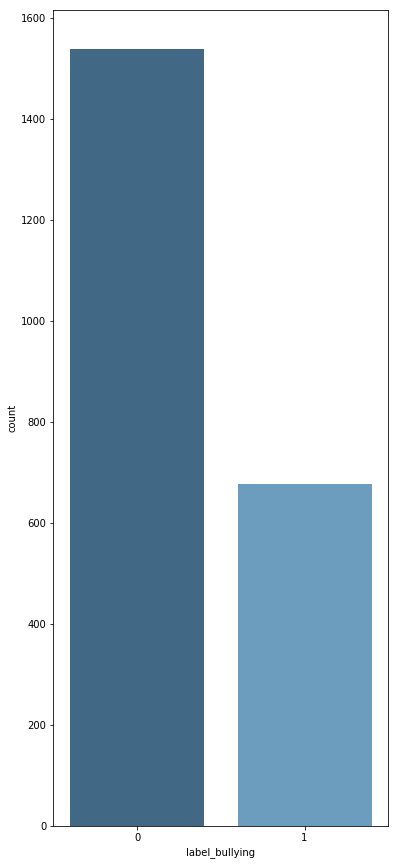

In [22]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.countplot(x="label_bullying", data=df_1, palette='Blues_d')

In [23]:
# group by label, count posts
cat_df = df_1.groupby('label_bullying').agg({'full_text': pd.Series.nunique})
            
cat_df

,full_text
label_bullying,
0,1538
1,678


Now let's check the second dataset.

In [24]:
df_2 = pd.read_csv('labeled_insta_2.csv', encoding='utf-8-sig', engine='python')

In [25]:
df_2.shape

(8817, 2)

In [26]:
df_2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 2 columns):
label_bullying    8817 non-null int64
text_message      8817 non-null object
dtypes: int64(1), object(1)
memory usage: 1.2 MB


In [27]:
df_2.head(10)

,label_bullying,text_message
0,0,yeah I got 2 backups for all that. I just hate when that happen. I been strugglin for a week now...handle that tho
1,0,I hate using my BB but love my iPhone. Haven't tried the new BB. My BB is provided by my corp. I don't get to pick which model
2,1,Get fucking real dude.
3,1,She is as dirty as they come and that crook Rengel the Dems are so fucking corrupt it's a joke. Make Republicans look like ...
4,1,why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here.
5,1,Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense.
6,1,WTF are you talking about Men? No men thats not a menage that's just gay.
7,1,Ill save you the trouble sister. Here comes a big ol fuck France block coming your way here on the twitter.
8,1,Im dead serious.Real athletes never cheat don't even have the appearance of at his level. Fuck him dude seriously I think he did
9,0,wow lol sounds like a lot of piss then hehehe


In [28]:
df_2.tail(10)

,label_bullying,text_message
8807,0,I like shopping I hate lines. My therapist asked me recently when you get sad: do you go on travel shopping sex sprees? YES!
8808,0,been there done that it really sucks. One of them isn't happy. I know I wasn't .
8809,0,Dude I've given up. After a girl who didn't want kids getting pissed at me when I got pissed at a pregnancy scare. Fuck 'em.
8810,0,he doesnt know i know hes gay or bi or w.e. Hes soooo high
8811,0,its not just that Corinne is a bitch she's proud of herself being a bitch and happy that people boo her - what a psycho
8812,0,no caffiene would kick my ass too - I'm addicted to my Dew
8813,0,Now I'm hungry. Damn you people and your midnight snack tweets!
8814,0,i've taken one also. people just piss me off more & more recently
8815,0,That too! Or even being able to park pulling in forward rather than backwards--I hate when the car behind me pulls up and BLOCKS!
8816,1,. . . HE'S FUCKING HIMSELF!


In [29]:
# number of unique values = count distinct
df_2['label_bullying'].nunique()

2

In [30]:
df_2 = df_2[['label_bullying', 'text_message']].rename(columns = {'text_message' : 'full_text'})

In [31]:
df_2.head()

,label_bullying,full_text
0,0,yeah I got 2 backups for all that. I just hate when that happen. I been strugglin for a week now...handle that tho
1,0,I hate using my BB but love my iPhone. Haven't tried the new BB. My BB is provided by my corp. I don't get to pick which model
2,1,Get fucking real dude.
3,1,She is as dirty as they come and that crook Rengel the Dems are so fucking corrupt it's a joke. Make Republicans look like ...
4,1,why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here.


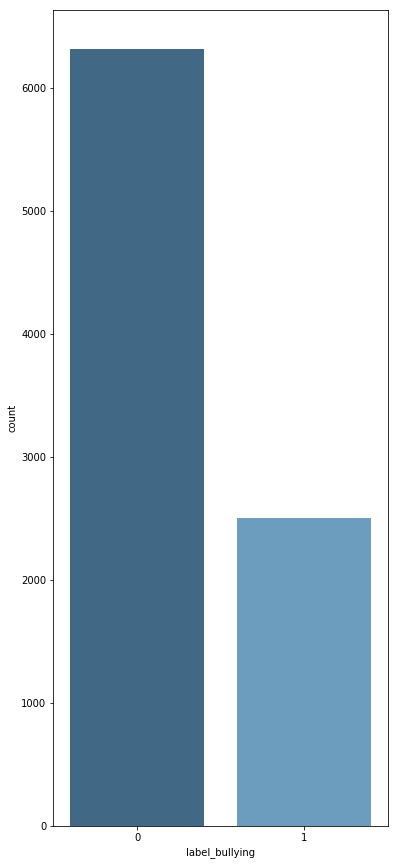

In [32]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.countplot(x="label_bullying", data=df_2, palette='Blues_d')

In [33]:
# group by label, count  posts
cat_df = df_2.groupby('label_bullying').agg({'full_text': pd.Series.nunique})
            
cat_df

,full_text
label_bullying,
0,6284
1,2480


In [34]:
df = pd.concat([df_1, df_2], axis=0)

/Users/laura/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
df.head(10)

,full_text,index,label_bullying
0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",0.0,1
1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1.0,1
2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",2.0,1
3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",3.0,1
4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",4.0,1
5,"<font color=""#0066CC"">moecomic</font> Lmao (created at:2012-04-06 09:19:14) <font color=""#0066CC"">allyfiato</font> ___¥ (created at:2012-04-06 12:18:02) empety empety empety empety empety...",5.0,1
6,"<font color=""#0066CC"">darealmistavuhsachee</font> <font color=""#0066CC"">@soapmanwun</font> is dat dro??? (created at:2012-04-08 18:37:27) <font color=""#0066CC"">colethegoon</font> looks awfull...",6.0,0
7,"<font color=""#0066CC"">bryan_rendon</font> Lmfao!!! Scary ass nigga (created at:2012-04-15 20:26:28) <font color=""#0066CC"">houstonm380</font> <font color=""#0066CC"">@rendon88</font> watch your ...",7.0,1
8,"<font color=""#0066CC"">chuckaghadiuno</font> <font color=""#0066CC"">@officialsarajay</font> Lucky man.____ (created at:2012-04-16 00:50:14) <font color=""#0066CC"">custombarberchairs</font> Sa...",8.0,0
9,"<font color=""#0066CC"">markeithcoleman</font> The gear fire. Wat does it Actually mean bruh? (created at:2012-04-18 01:31:01) <font color=""#0066CC"">cee3papi</font> Ice-T voice..... <font color...",9.0,1


In [36]:
#drop the index column
del df['index']

In [37]:
df.head(10)

,full_text,label_bullying
0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1
1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1
2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1
3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1
4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1
5,"<font color=""#0066CC"">moecomic</font> Lmao (created at:2012-04-06 09:19:14) <font color=""#0066CC"">allyfiato</font> ___¥ (created at:2012-04-06 12:18:02) empety empety empety empety empety...",1
6,"<font color=""#0066CC"">darealmistavuhsachee</font> <font color=""#0066CC"">@soapmanwun</font> is dat dro??? (created at:2012-04-08 18:37:27) <font color=""#0066CC"">colethegoon</font> looks awfull...",0
7,"<font color=""#0066CC"">bryan_rendon</font> Lmfao!!! Scary ass nigga (created at:2012-04-15 20:26:28) <font color=""#0066CC"">houstonm380</font> <font color=""#0066CC"">@rendon88</font> watch your ...",1
8,"<font color=""#0066CC"">chuckaghadiuno</font> <font color=""#0066CC"">@officialsarajay</font> Lucky man.____ (created at:2012-04-16 00:50:14) <font color=""#0066CC"">custombarberchairs</font> Sa...",0
9,"<font color=""#0066CC"">markeithcoleman</font> The gear fire. Wat does it Actually mean bruh? (created at:2012-04-18 01:31:01) <font color=""#0066CC"">cee3papi</font> Ice-T voice..... <font color...",1


In [38]:
# save the dataframe to a new file
df.reset_index().to_csv('labeled_insta_combined.csv', index = False, encoding='utf-8-sig')

**Data cleaning**

In order to clean the data, we’ll perform the following actions:
- remove user ids
- remove html formatting
- remove punctuations
- remove digits
- remove stopwords
- remove user ids
- expand contractions and slang
- apply lemmatization.

For removing punctuations, I'll use Python's constant called string.punctuation that provides already a list of punctuation characters.

Stop words are those words that do not add a deeper meaning to the phrase. They are the most common words such as: “the“, “a“, and “is“. For our application, it makes sense to remove stop words, since they typically  do not convey sentiments. NLTK provides a list of commonly agreed upon stop words for English, so I'll use that. 

Stemming is the process of converting the words of a sentence to its non-changing portions. For example "trying", "trial", and "tried", the stem would be "tri". I've tried PorterStemmer for this part, but was not very happy with the result, so I will not apply stemming here.

Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words "trying", "trial", and "tried", the lemma for each and all would be "try". Once again I'll use NLTK which has a great built in lemmatizer.

In [39]:
df = pd.read_csv('labeled_insta_combined.csv', encoding='utf-8-sig', engine='python')

In [40]:
df.head()

,index,full_text,label_bullying
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1


In [41]:
df.tail()

,index,full_text,label_bullying
11028,8812,no caffiene would kick my ass too - I'm addicted to my Dew,0
11029,8813,Now I'm hungry. Damn you people and your midnight snack tweets!,0
11030,8814,i've taken one also. people just piss me off more & more recently,0
11031,8815,That too! Or even being able to park pulling in forward rather than backwards--I hate when the car behind me pulls up and BLOCKS!,0
11032,8816,. . . HE'S FUCKING HIMSELF!,1


I noticed that the user ids are formatted as "<font...> user <.../font>", so I'll remove those tags and everything in between.

In [42]:
df['tidy_text'] = df['full_text'].apply(lambda x: re.sub('<font.*?font>', '', x))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"Bad picture (created at:2012-06-03 12:44:40) Well.... maybe you should tell people to stop cursing k,K! Thx love u bestieeee (created at:2013-04-06 01:26:59) empety empety empety empety e..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,Damn bro thats nice (created at:2012-02-13 12:39:58) Don't hate cuz you ain't doin it like them.. Real talk. (created at:2012-02-13 16:00:00) empety empety empety empety empety empety empe...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) Fire that fuck, thieves never stop. Open hand slap for sure. (created at:2012-02-28 01:24:46) empety empety empety empety empety ..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,So cute __â (created at:2012-03-11 16:17:53) good to know (created at:2012-03-11 16:36:54) empety empety empety empety empety empety empety empety empety empety Awwww so precious c...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a 160 lb boy unarmed possibly do to an alleged 250lb George with a pistol. Come on n...


In [43]:
# remove html formatting, if any other left
def remove_tags(row):
    if row is None:
            return None
    else:
            return ''.join(BeautifulSoup(row).findAll(text=True)) 

In [44]:
df['tidy_text'] = df['tidy_text'].apply(lambda x: remove_tags(x))
df.head()

/Users/laura/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "http://tinyurl.com/these-hats-are-damn-tradition" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"Bad picture (created at:2012-06-03 12:44:40) Well.... maybe you should tell people to stop cursing k,K! Thx love u bestieeee (created at:2013-04-06 01:26:59) empety empety empety empety e..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,Damn bro thats nice (created at:2012-02-13 12:39:58) Don't hate cuz you ain't doin it like them.. Real talk. (created at:2012-02-13 16:00:00) empety empety empety empety empety empety empe...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) Fire that fuck, thieves never stop. Open hand slap for sure. (created at:2012-02-28 01:24:46) empety empety empety empety empety ..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,So cute __â (created at:2012-03-11 16:17:53) good to know (created at:2012-03-11 16:36:54) empety empety empety empety empety empety empety empety empety empety Awwww so precious c...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a 160 lb boy unarmed possibly do to an alleged 250lb George with a pistol. Come on n...


In [45]:
# remove all occurences of "empety"
df['tidy_text'] = df['tidy_text'].apply(lambda x: x.replace("empety", ""))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"Bad picture (created at:2012-06-03 12:44:40) Well.... maybe you should tell people to stop cursing k,K! Thx love u bestieeee (created at:2013-04-06 01:26:59) im really confu..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,Damn bro thats nice (created at:2012-02-13 12:39:58) Don't hate cuz you ain't doin it like them.. Real talk. (created at:2012-02-13 16:00:00) PASS IT. SMOKE IT. (created at:2...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) Fire that fuck, thieves never stop. Open hand slap for sure. (created at:2012-02-28 01:24:46) Chin check !. (create..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,So cute __â (created at:2012-03-11 16:17:53) good to know (created at:2012-03-11 16:36:54) Awwww so precious congrats (created at:2012-03-11 16:38:07) Aww I...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a 160 lb boy unarmed possibly do to an alleged 250lb George with a pistol. Come on n...


In [46]:
# remove information regarding creation time (created_at:  )
# everything between two brackets if first bracket is followed by the word "created".
df['tidy_text'] = df['tidy_text'].apply(lambda x: re.sub(r'\(created[^()]*\)', '', x))

df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"Bad picture Well.... maybe you should tell people to stop cursing k,K! Thx love u bestieeee im really confused by me telling people to stop cursing. and i wouldnt be besti..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,Damn bro thats nice Don't hate cuz you ain't doin it like them.. Real talk. PASS IT. SMOKE IT. Needs a inline perc off that stem I wish Mac wo...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"Kick his Ass C-Bass___ Fire that fuck, thieves never stop. Open hand slap for sure. Chin check !. You'll have your own place away from this twat thief in n..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,So cute __â good to know Awwww so precious congrats Aww I miss this!! Cute...(: (8 Omg SO CUTE!!!! Who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a 160 lb boy unarmed possibly do to an alleged 250lb George with a pistol. Come on n...


In [47]:
# save the dataframe to a new file
df.to_csv('labeled_insta_precleaned.csv', index = False, encoding='utf-8-sig')

In [48]:
df = pd.read_csv('labeled_insta_precleaned.csv', encoding='utf-8-sig', engine='python')

In [49]:
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"Bad picture Well.... maybe you should tell people to stop cursing k,K! Thx love u bestieeee im really confused by me telling people to stop cursing. and i wouldnt be besti..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,Damn bro thats nice Don't hate cuz you ain't doin it like them.. Real talk. PASS IT. SMOKE IT. Needs a inline perc off that stem I wish Mac wo...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"Kick his Ass C-Bass___ Fire that fuck, thieves never stop. Open hand slap for sure. Chin check !. You'll have your own place away from this twat thief in n..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,So cute __â good to know Awwww so precious congrats Aww I miss this!! Cute...(: (8 Omg SO CUTE!!!! Who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a 160 lb boy unarmed possibly do to an alleged 250lb George with a pistol. Come on n...


In [50]:
# to lower case
df["tidy_text"] = df["tidy_text"].str.lower()
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe you should tell people to stop cursing k,k! thx love u bestieeee im really confused by me telling people to stop cursing. and i wouldnt be besti..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro thats nice don't hate cuz you ain't doin it like them.. real talk. pass it. smoke it. needs a inline perc off that stem i wish mac wo...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick his ass c-bass___ fire that fuck, thieves never stop. open hand slap for sure. chin check !. you'll have your own place away from this twat thief in n..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,so cute __â good to know awwww so precious congrats aww i miss this!! cute...(: (8 omg so cute!!!! who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still doesn't give someone the right to kill a teen who is unarmed. no matter what race. what could trayvon a 160 lb boy unarmed possibly do to an alleged 250lb george with a pistol. come on n...


In [51]:
# to lower case
df["tidy_text"] = df["tidy_text"].str.lower()
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe you should tell people to stop cursing k,k! thx love u bestieeee im really confused by me telling people to stop cursing. and i wouldnt be besti..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro thats nice don't hate cuz you ain't doin it like them.. real talk. pass it. smoke it. needs a inline perc off that stem i wish mac wo...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick his ass c-bass___ fire that fuck, thieves never stop. open hand slap for sure. chin check !. you'll have your own place away from this twat thief in n..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,so cute __â good to know awwww so precious congrats aww i miss this!! cute...(: (8 omg so cute!!!! who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still doesn't give someone the right to kill a teen who is unarmed. no matter what race. what could trayvon a 160 lb boy unarmed possibly do to an alleged 250lb george with a pistol. come on n...


I've experimented with different python libraries for contractions, but was unsuccessful, so I've decided to write my own function. I've used this article as inspiration but simplified the contraction expansion using match.
https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py

In [52]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [53]:
contractions_re = re.compile('(%s)' % '|'.join(CONTRACTION_MAP.keys()))
def expand_contractions(s, CONTRACTION_MAP=CONTRACTION_MAP):
    def replace(match):
            return CONTRACTION_MAP[match.group(0)]
    return contractions_re.sub(replace, s)

In [54]:
# expand contractions
df["tidy_text"] = df['tidy_text'].apply(lambda x: expand_contractions(x))
df.head(10)

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe you should tell people to stop cursing k,k! thx love u bestieeee im really confused by me telling people to stop cursing. and i wouldnt be besti..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro thats nice do not hate cuz you is not doin it like them.. real talk. pass it. smoke it. needs a inline perc off that stem i wish mac ...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick his ass c-bass___ fire that fuck, thieves never stop. open hand slap for sure. chin check !. you will have your own place away from this twat thief in..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,so cute __â good to know awwww so precious congrats aww i miss this!! cute...(: (8 omg so cute!!!! who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still does not give someone the right to kill a teen who is unarmed. no matter what race. what could trayvon a 160 lb boy unarmed possibly do to an alleged 250lb george with a pistol. come on ...
5,5,"<font color=""#0066CC"">moecomic</font> Lmao (created at:2012-04-06 09:19:14) <font color=""#0066CC"">allyfiato</font> ___¥ (created at:2012-04-06 12:18:02) empety empety empety empety empety...",1,lmao ___¥ your hairline is so dicked ___¥___¥ ugly ass dickhead ugly he is not that ugly assholes. ...
6,6,"<font color=""#0066CC"">darealmistavuhsachee</font> <font color=""#0066CC"">@soapmanwun</font> is dat dro??? (created at:2012-04-08 18:37:27) <font color=""#0066CC"">colethegoon</font> looks awfull...",0,is dat dro??? looks awfully quiet get on that game! mids do not fuckin do drugs guys! sup wit dat reggie mah nigga ...
7,7,"<font color=""#0066CC"">bryan_rendon</font> Lmfao!!! Scary ass nigga (created at:2012-04-15 20:26:28) <font color=""#0066CC"">houstonm380</font> <font color=""#0066CC"">@rendon88</font> watch your ...",1,"lmfao!!! scary ass nigga watch your fuckin mouth the fuck i gotta watch my mouth for? you have no reason to use the word ""nigga"" oh shit i a..."
8,8,"<font color=""#0066CC"">chuckaghadiuno</font> <font color=""#0066CC"">@officialsarajay</font> Lucky man.____ (created at:2012-04-16 00:50:14) <font color=""#0066CC"">custombarberchairs</font> Sa...",0,lucky man.____ sarajay and my hommie j breeze. sup yall omg that ass gotta luv sara azzz!...it is major! ....? iono wh...
9,9,"<font color=""#0066CC"">markeithcoleman</font> The gear fire. Wat does it Actually mean bruh? (created at:2012-04-18 01:31:01) <font color=""#0066CC"">cee3papi</font> Ice-T voice..... <font color...",1,the gear fire. wat does it actually mean bruh? ice-t voice..... & yall both eat a dick bitch niggas!!!!! burn n hell wit em biooootccch i dnt how the bum a...


I will now use emoji.demojize to transform emojis.

https://github.com/carpedm20/emoji/blob/1367bf8d5751d182e4f278cab7ce248716fe71f9/emoji/core.py#L55

In [55]:
# transform emoji
import emoji
df['tidy_text'] = df['tidy_text'].apply(lambda x: emoji.demojize(x))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe you should tell people to stop cursing k,k! thx love u bestieeee im really confused by me telling people to stop cursing. and i wouldnt be besti..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro thats nice do not hate cuz you is not doin it like them.. real talk. pass it. smoke it. needs a inline perc off that stem i wish mac ...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick his ass c-bass___ fire that fuck, thieves never stop. open hand slap for sure. chin check !. you will have your own place away from this twat thief in..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,so cute __â good to know awwww so precious congrats aww i miss this!! cute...(: (8 omg so cute!!!! who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still does not give someone the right to kill a teen who is unarmed. no matter what race. what could trayvon a 160 lb boy unarmed possibly do to an alleged 250lb george with a pistol. come on ...


Borrowing code from the blog post below I will replace some of the slang words with their proper form. 
I did not use the slang file from the github linked to the post, but instead created my own, based on https://www.netlingo.com/acronyms.php and my observations of the most common slang words in my corpus.

In [56]:
# Code From: https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222
import csv

def slang_translator(input_string):
    input_string = input_string.split(" ")
    j = 0
    for _str in input_string:
        # File path which consists of abbreviations and slangs.
        file_name = "slang.txt"

        # File Access mode [Read Mode]
        with open(file_name, "r") as my_file:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            my_data = csv.reader(my_file, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9]+', '', _str)
            for row in my_data:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.lower() == row[0].lower():
                    # If match found replace it with its appropriate phrase in text file.
                    input_string[j] = row[1].lower()
            my_file.close()
        j = j + 1
    return ' '.join(input_string)

In [57]:
df['tidy_text'] = df['tidy_text'].apply(lambda x: slang_translator(x))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe you should tell people to stop cursing k,k! thank you love you bestieeee im really confused by me telling people to stop cursing. and i wouldnt ..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro that is nice do not hate because you is not doing it like them.. real talk. pass it. smoke it. needs a inline perc off that stem i wi...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick his ass c-bass___ fire that fuck, thieves never stop. open hand slap for sure. chin check !. you will have your own place away from this twat thief in..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,so cute __â good to know awwww so precious congrats aww i miss this!! cute...(: (8 omg so cute!!!! who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still does not give someone the right to kill a teen who is unarmed. no matter what race. what could trayvon a 160 lb boy unarmed possibly do to an alleged 250lb george with a pistol. come on ...


In [58]:
# to lower case
df["tidy_text"] = df["tidy_text"].str.lower()
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe you should tell people to stop cursing k,k! thank you love you bestieeee im really confused by me telling people to stop cursing. and i wouldnt ..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro that is nice do not hate because you is not doing it like them.. real talk. pass it. smoke it. needs a inline perc off that stem i wi...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick his ass c-bass___ fire that fuck, thieves never stop. open hand slap for sure. chin check !. you will have your own place away from this twat thief in..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,so cute __â good to know awwww so precious congrats aww i miss this!! cute...(: (8 omg so cute!!!! who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still does not give someone the right to kill a teen who is unarmed. no matter what race. what could trayvon a 160 lb boy unarmed possibly do to an alleged 250lb george with a pistol. come on ...


In [59]:
# spell corrections 
from spellchecker import SpellChecker

spell = SpellChecker(distance=1)

df['tidy_text'] = df['tidy_text'].apply(lambda x: spell.correction(x))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe you should tell people to stop cursing k,k! thank you love you bestieeee im really confused by me telling people to stop cursing. and i wouldnt ..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro that is nice do not hate because you is not doing it like them.. real talk. pass it. smoke it. needs a inline perc off that stem i wi...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick his ass c-bass___ fire that fuck, thieves never stop. open hand slap for sure. chin check !. you will have your own place away from this twat thief in..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,so cute __â good to know awwww so precious congrats aww i miss this!! cute...(: (8 omg so cute!!!! who is th...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still does not give someone the right to kill a teen who is unarmed. no matter what race. what could trayvon a 160 lb boy unarmed possibly do to an alleged 250lb george with a pistol. come on ...


In [60]:
# remove stopwords, but keep a whitelist, since words like "no" or "not" are an indication of a sentiment or quite the opposite

whitelist = ["not", "no"]

stop_words = set(stopwords.words('english'))
df['tidy_text'] = df['tidy_text'].apply(lambda x: ' '.join([word for word in x.split() if (word not in stop_words or word in whitelist)]))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,"bad picture well.... maybe tell people stop cursing k,k! thank love bestieeee im really confused telling people stop cursing. wouldnt bestiessss someone told step lego, ya. idk find need rude tell..."
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro nice not hate not like them.. real talk. pass it. smoke it. needs inline perc stem wish mac would buy bong roors shit wack brimmers treejay laughing loud 420 likes !!!!! dope! man knows u...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,"kick ass c-bass___ fire fuck, thieves never stop. open hand slap sure. chin check !. place away twat thief no time!! kick ass seabass! dang. sucks. least got em back. fucking pigs ...!!! laughi..."
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,"cute __â good know awwww precious congrats aww miss this!! cute...(: (8 omg cute!!!! daughter touching picture smiling haha loves babies __â__¥_ aww possible breast milk bottle, sayin :..."
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still not give someone right kill teen unarmed. no matter race. could trayvon 160 lb boy unarmed possibly alleged 250lb george pistol. come now. anyone brain would know answer. -__- not assuming a...


In [61]:
# remove punctuation
df['tidy_text'] = df['tidy_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,bad picture well maybe tell people stop cursing kk thank love bestieeee im really confused telling people stop cursing wouldnt bestiessss someone told step lego ya idk find need rude telling someo...
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro nice not hate not like them real talk pass it smoke it needs inline perc stem wish mac would buy bong roors shit wack brimmers treejay laughing loud 420 likes dope man knows up ahah sick...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,kick ass cbass fire fuck thieves never stop open hand slap sure chin check place away twat thief no time kick ass seabass dang sucks least got em back fucking pigs laughing loud man call bitc...
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,cute â good know awwww precious congrats aww miss this cute 8 omg cute daughter touching picture smiling haha loves babies â¥ aww possible breast milk bottle sayin people cannot breast...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still not give someone right kill teen unarmed no matter race could trayvon 160 lb boy unarmed possibly alleged 250lb george pistol come now anyone brain would know answer not assuming anything t...


In [62]:
# remove digits
df['tidy_text'] = df['tidy_text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,bad picture well maybe tell people stop cursing kk thank love bestieeee im really confused telling people stop cursing wouldnt bestiessss someone told step lego ya idk find need rude telling someo...
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro nice not hate not like them real talk pass it smoke it needs inline perc stem wish mac would buy bong roors shit wack brimmers treejay laughing loud likes dope man knows up ahah sick go...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,kick ass cbass fire fuck thieves never stop open hand slap sure chin check place away twat thief no time kick ass seabass dang sucks least got em back fucking pigs laughing loud man call bitc...
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,cute â good know awwww precious congrats aww miss this cute omg cute daughter touching picture smiling haha loves babies â¥ aww possible breast milk bottle sayin people cannot breast ...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still not give someone right kill teen unarmed no matter race could trayvon lb boy unarmed possibly alleged lb george pistol come now anyone brain would know answer not assuming anything telling...


In [63]:
# remove special (all non-ASCII) characters
# characters are 8 byte (0-255), ascii chars are 7 byte (0-127), so we simply drop all chars with a ord value below 128

df['tidy_text'] = df['tidy_text'].apply(lambda x: ''.join((c for c in str(x) if ord(c) < 128)))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,bad picture well maybe tell people stop cursing kk thank love bestieeee im really confused telling people stop cursing wouldnt bestiessss someone told step lego ya idk find need rude telling someo...
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro nice not hate not like them real talk pass it smoke it needs inline perc stem wish mac would buy bong roors shit wack brimmers treejay laughing loud likes dope man knows up ahah sick go...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,kick ass cbass fire fuck thieves never stop open hand slap sure chin check place away twat thief no time kick ass seabass dang sucks least got em back fucking pigs laughing loud man call bitch k...
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,cute good know awwww precious congrats aww miss this cute omg cute daughter touching picture smiling haha loves babies aww possible breast milk bottle sayin people cannot breast feed not produ...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still not give someone right kill teen unarmed no matter race could trayvon lb boy unarmed possibly alleged lb george pistol come now anyone brain would know answer not assuming anything telling...


In [64]:
# stemming
# ps = PorterStemmer()
# df['stemmed_text'] = df['tidy_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))
# df.head()

In [65]:
# lemmatization
wnlmtz = WordNetLemmatizer()
df['tidy_text'] = df['tidy_text'].apply(lambda x: ' '.join([wnlmtz.lemmatize(word,'v') for word in x.split() ]))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,bad picture well maybe tell people stop curse kk thank love bestieeee im really confuse tell people stop curse wouldnt bestiessss someone tell step lego ya idk find need rude tell someone not mean...
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro nice not hate not like them real talk pass it smoke it need inline perc stem wish mac would buy bong roors shit wack brimmers treejay laugh loud like dope man know up ahah sick get one bl...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,kick ass cbass fire fuck thieve never stop open hand slap sure chin check place away twat thief no time kick ass seabass dang suck least get em back fuck pig laugh loud man call bitch keep truck b...
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,cute good know awwww precious congrats aww miss this cute omg cute daughter touch picture smile haha love baby aww possible breast milk bottle sayin people cannot breast fee not produce milk mom o...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still not give someone right kill teen unarm no matter race could trayvon lb boy unarm possibly allege lb george pistol come now anyone brain would know answer not assume anything tell think it im...


In [66]:
# remove single letters
df['tidy_text'] = df['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df.head()

,index,full_text,label_bullying,tidy_text
0,0,"<font color=""#0066CC"">margretricee</font> Bad picture (created at:2012-06-03 12:44:40) <font color=""#0066CC"">abbysqueens</font> Well.... <font color=""#0066CC"">@emilyreeves8</font> maybe you s...",1,bad picture well maybe tell people stop curse kk thank love bestieeee im really confuse tell people stop curse wouldnt bestiessss someone tell step lego ya idk find need rude tell someone not mean...
1,1,"<font color=""#0066CC"">mightyzulu</font> Damn bro thats nice (created at:2012-02-13 12:39:58) <font color=""#0066CC"">ybdarocka</font> Don't hate cuz you ain't doin it like them.. Real talk. (c...",1,damn bro nice not hate not like them real talk pass it smoke it need inline perc stem wish mac would buy bong roors shit wack brimmers treejay laugh loud like dope man know up ahah sick get one bl...
2,2,"<font color=""#0066CC"">wayne_dizzle818</font> Kick his Ass C-Bass___ (created at:2012-02-28 00:58:44) <font color=""#0066CC"">crayoladevotion</font> Fire that fuck, thieves never stop. Open h...",1,kick ass cbass fire fuck thieve never stop open hand slap sure chin check place away twat thief no time kick ass seabass dang suck least get em back fuck pig laugh loud man call bitch keep truck b...
3,3,"<font color=""#0066CC"">samantha_nora</font> So cute __â (created at:2012-03-11 16:17:53) <font color=""#0066CC"">jbug_</font> <font color=""#0066CC"">@ericacer</font> good to know (created at...",1,cute good know awwww precious congrats aww miss this cute omg cute daughter touch picture smile haha love baby aww possible breast milk bottle sayin people cannot breast fee not produce milk mom o...
4,4,"<font color=""#0066CC"">itsmyrayeraye</font> <font color=""#0066CC"">@runl1keh3ll</font> still doesn't give someone the right to kill a teen who is unarmed. No matter what race. What could Trayvon a...",1,still not give someone right kill teen unarm no matter race could trayvon lb boy unarm possibly allege lb george pistol come now anyone brain would know answer not assume anything tell think it im...


In [67]:
# one last check to see if the data cleaning hasn't completely removed all the words in some of the rows with very few words
df.isnull().values.any()

False

In [68]:
cumulative_sum = {}

for x in df["tidy_text"].values:
    cumulative_sum.update(dict.fromkeys(set(x.lower().split())))

In [69]:
print(len(cumulative_sum))

55121


Let's check the distribution of classes, since we know we're dealing with an unbalanced dataset.

In [70]:
neg, pos = np.bincount(df.label_bullying)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 11033
    Positive: 3183 (28.85% of total)



Text(0, 0.5, 'Label')

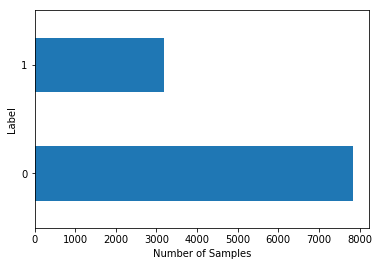

In [71]:
import matplotlib.pyplot as plt
ax = df['label_bullying'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Label")

We have roughly 70 : 30 distribution of classes, so we'll need a strategy to deal with the imbalance.

In [72]:
# save the dataframe to a new file
df.to_csv('labeled_insta_cleaned.csv', index = False, encoding='utf-8-sig')

**Analysis of the full text comments**


I will start by computing some basic statistics on the comments.

**Number of characters**

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the comments length.

In [73]:
df = pd.read_csv('labeled_insta_cleaned.csv', encoding='utf-8-sig', engine='python')

In [74]:
df['char_count'] = df['tidy_text'].apply(lambda x: len(str(x)))
df[['tidy_text','char_count']].head(10)

,tidy_text,char_count
0,bad picture well maybe tell people stop curse kk thank love bestieeee im really confuse tell people stop curse wouldnt bestiessss someone tell step lego ya idk find need rude tell someone not mean...,599
1,damn bro nice not hate not like them real talk pass it smoke it need inline perc stem wish mac would buy bong roors shit wack brimmers treejay laugh loud like dope man know up ahah sick get one bl...,491
2,kick ass cbass fire fuck thieve never stop open hand slap sure chin check place away twat thief no time kick ass seabass dang suck least get em back fuck pig laugh loud man call bitch keep truck b...,456
3,cute good know awwww precious congrats aww miss this cute omg cute daughter touch picture smile haha love baby aww possible breast milk bottle sayin people cannot breast fee not produce milk mom o...,4038
4,still not give someone right kill teen unarm no matter race could trayvon lb boy unarm possibly allege lb george pistol come now anyone brain would know answer not assume anything tell think it im...,13947
5,laugh ass hairline dicked ugly ass dickhead ugly not ugly assholes run around shirt like tyler famous shit yeah exactly tylers famous yeah retard sus sus fuck bro hater homie not no hater nigga ea...,1049
6,dat dro look awfully quiet get game mids not fuckin drug guy whats wit dat reggie mah nigga since take least get chance smoke blunt you roll ready concert may nd not fangirling think legit fuck ya...,402
7,laugh fuck ass scary ass nigga watch fuckin mouth fuck gotta watch mouth for no reason use word nigga oh shit sorry please forgive nigga ask take laugh fuck ass think shit like go facebook laugh l...,940
8,lucky man sarajay hommie breeze whats yall omg ass gotta love sara azzzit major iono askin watch last two weeks fuck lucky lucky fuck nigger nice ass saw scene pinky fuckin hot wat name look upis ...,337
9,gear fire wat actually mean bruh icet voice yall eat dick bitch niggas burn hell wit em biooootccch dnt bum ass niggas take time outta yall day go lurkin niggas page take yall scary ass slp go mak...,781


In [75]:
df.sort_values(by='char_count', ascending=False).head()

,index,full_text,label_bullying,tidy_text,char_count
246,246,"<font color=""#0066CC"">presstaaallll</font> <font color=""#0066CC"">@_the_kenzie_</font> I FEEL YOU! WHEN I READ THAT I FELT LIKE YOU WERE EXPLAINING MY EXACT SITUATION WITH SOMEONE I KNOW!!! (cre...",1,feel you read felt like explain exact situation someone know also something bother me think it sister annoy sister ever ok girls church grade year sister one grade quiet awkward talk whatever noth...,25607
670,670,"<font color=""#0066CC"">docdidit</font> For the muslim the anti christ is called ""al-dajjal"" (created at:2014-02-04 01:33:16) <font color=""#0066CC"">muslim4lyf</font> <font color=""#0066CC"">@reve...",0,muslim anti christ call aldajjal well know beleive jesus come back soon save us beleivers yes ofcource whatever muslims believe jesus christ peace come restore peace justice onto earth whatever al...,21404
835,835,"<font color=""#0066CC"">baby.dawn</font> To my mom: I'm sorry I suck at everything. Sorry I'm failing school. Sorry in a fuck up. In sorry that I smile every day and hide my depression. In sorry t...",0,mom sorry suck everything sorry fail school sorry fuck up sorry smile every day hide depression sorry lie say nothing every time ask wrong sorry want kill no idea sorry never feel good enough ir a...,21225
919,919,"<font color=""#0066CC"">https.imvu</font> I dont like Ur mom e.e <font color=""#0066CC"">@cutting</font> (created at:2014-06-21 21:24:57) <font color=""#0066CC"">katie_graf</font> And i can't forge...",0,not like mom ee cannot forget friends plan something without hang one them cannot believe actually shove face post picture like with lovelies think one obviously mistake want help everything over ...,20666
879,879,"<font color=""#0066CC"">arijanab3risha</font> Anybody can love whoever they choose (created at:2014-08-02 01:00:24) <font color=""#0066CC"">thesullym0nster</font> I will, cause it's gonna be awes...",1,anybody love whoever choose will gonna awesome cannot accuse judge clearly give opinion religion not recall say uhgrace judge people look give opinion someone start snap like something wrong sorry...,18007


In [76]:
df.groupby('label_bullying')['char_count'].describe()

,count,mean,std,min,25%,50%,75%,max
label_bullying,,,,,,,,
0,7850.0,344.340764,1063.704935,3.0,35.0,59.0,85.0,21404.0
1,3183.0,800.516808,2085.854670,3.0,28.0,55.0,86.0,25607.0


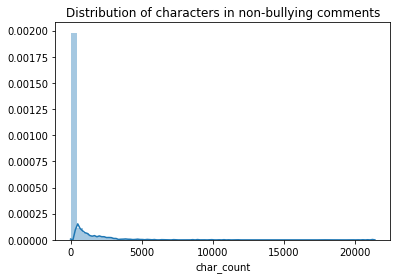

In [77]:
sns.distplot(df['char_count'][df['label_bullying']==0]).set_title("Distribution of characters in non-bullying comments");

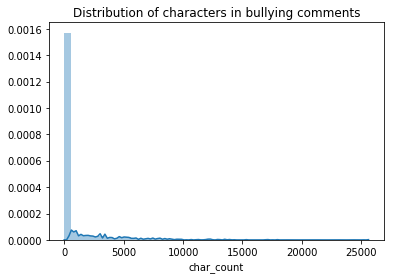

In [78]:
sns.distplot(df['char_count'][df['label_bullying']==1]).set_title("Distribution of characters in bullying comments");

**Number of words**

Now, we will move on to data exploration at a word-level.

In [79]:
df['word_count'] = df['tidy_text'].apply(lambda x: len(str(x).split(" ")))
df[['tidy_text','word_count']].head(10)

,tidy_text,word_count
0,bad picture well maybe tell people stop curse kk thank love bestieeee im really confuse tell people stop curse wouldnt bestiessss someone tell step lego ya idk find need rude tell someone not mean...,110
1,damn bro nice not hate not like them real talk pass it smoke it need inline perc stem wish mac would buy bong roors shit wack brimmers treejay laugh loud like dope man know up ahah sick get one bl...,95
2,kick ass cbass fire fuck thieve never stop open hand slap sure chin check place away twat thief no time kick ass seabass dang suck least get em back fuck pig laugh loud man call bitch keep truck b...,84
3,cute good know awwww precious congrats aww miss this cute omg cute daughter touch picture smile haha love baby aww possible breast milk bottle sayin people cannot breast fee not produce milk mom o...,687
4,still not give someone right kill teen unarm no matter race could trayvon lb boy unarm possibly allege lb george pistol come now anyone brain would know answer not assume anything tell think it im...,2255
5,laugh ass hairline dicked ugly ass dickhead ugly not ugly assholes run around shirt like tyler famous shit yeah exactly tylers famous yeah retard sus sus fuck bro hater homie not no hater nigga ea...,186
6,dat dro look awfully quiet get game mids not fuckin drug guy whats wit dat reggie mah nigga since take least get chance smoke blunt you roll ready concert may nd not fangirling think legit fuck ya...,74
7,laugh fuck ass scary ass nigga watch fuckin mouth fuck gotta watch mouth for no reason use word nigga oh shit sorry please forgive nigga ask take laugh fuck ass think shit like go facebook laugh l...,174
8,lucky man sarajay hommie breeze whats yall omg ass gotta love sara azzzit major iono askin watch last two weeks fuck lucky lucky fuck nigger nice ass saw scene pinky fuckin hot wat name look upis ...,66
9,gear fire wat actually mean bruh icet voice yall eat dick bitch niggas burn hell wit em biooootccch dnt bum ass niggas take time outta yall day go lurkin niggas page take yall scary ass slp go mak...,143


In [80]:
df.groupby('label_bullying')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
label_bullying,,,,,,,,
0,7850.0,58.920892,178.870824,1.0,6.0,10.0,15.0,3745.0
1,3183.0,138.212064,356.961968,1.0,5.0,10.0,15.0,4440.0


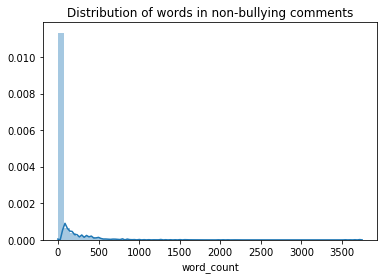

In [81]:
sns.distplot(df['word_count'][df['label_bullying']==0]).set_title("Distribution of words in non-bullying comments");

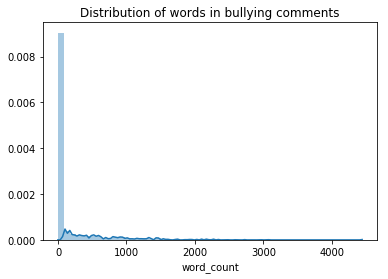

In [82]:
sns.distplot(df['word_count'][df['label_bullying']==1]).set_title("Distribution of words in bullying comments");

Altough some comments may be lengthy, they are generally short in nature, which is what we would expect from instagram comments.

In [83]:
df = df.sort_values(['word_count'], ascending=True)
df[df['label_bullying'] == 1].head()

,index,full_text,label_bullying,tidy_text,char_count,word_count
7288,5072,damn.,1,damn,4,1
7280,5064,FUCK.,1,fuck,4,1
4293,2077,you'll be a a monit-whore.,1,monitwhore,10,1
4295,2079,i hate you,1,hate,4,1
7128,4912,damn.,1,damn,4,1


In [84]:
df = df.sort_values(['word_count'], ascending=False)
df[df['label_bullying'] == 1].head()

,index,full_text,label_bullying,tidy_text,char_count,word_count
246,246,"<font color=""#0066CC"">presstaaallll</font> <font color=""#0066CC"">@_the_kenzie_</font> I FEEL YOU! WHEN I READ THAT I FELT LIKE YOU WERE EXPLAINING MY EXACT SITUATION WITH SOMEONE I KNOW!!! (cre...",1,feel you read felt like explain exact situation someone know also something bother me think it sister annoy sister ever ok girls church grade year sister one grade quiet awkward talk whatever noth...,25607,4440
616,616,"<font color=""#0066CC"">c_hall30</font> <font color=""#0066CC"">@hilldog11</font> lmao your funny, I actually hate the Heat. I'm a Golden St. Warriors fan. And I'm from NY hence the Yankee hat and I...",1,laugh ass funny actually hate heat golden st warriors fan ny hence yankee hat watch pat underdogs ram little kid start watch football tht season notice tht colorado wear boston celtics hat frontru...,17120,3068
879,879,"<font color=""#0066CC"">arijanab3risha</font> Anybody can love whoever they choose (created at:2014-08-02 01:00:24) <font color=""#0066CC"">thesullym0nster</font> I will, cause it's gonna be awes...",1,anybody love whoever choose will gonna awesome cannot accuse judge clearly give opinion religion not recall say uhgrace judge people look give opinion someone start snap like something wrong sorry...,18007,2958
783,783,"<font color=""#0066CC"">o_w_n_</font> <font color=""#0066CC"">#own</font> <font color=""#0066CC"">#nwo</font> <font color=""#0066CC"">#newworldorder</font> <font color=""#0066CC"">#illuminati</font> <font...",1,google allahu akbar arabic look image look nothing like all go attempt spread information world make sure facts not bs yeah busy bible refer google biblr find turkey pro muslim bible fake google b...,16999,2723
802,802,"<font color=""#0066CC"">lauren__draws</font> I'm gay. <font color=""#0066CC"">@jesuslovesyou721</font> (created at:2014-04-14 01:27:34) <font color=""#0066CC"">lauren__draws</font> I've never been ...",1,gay never believer would not want mean lie punish forever think fuck tht sin silently hatred homo not choice think would choose tht uhh obvi not idiot never say god not like gays bible go hang pru...,15303,2602


**Average Word Length**

In [85]:
df['avg_word'] = df['tidy_text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df[['tidy_text','avg_word']].head()

,tidy_text,avg_word
246,feel you read felt like explain exact situation someone know also something bother me think it sister annoy sister ever ok girls church grade year sister one grade quiet awkward talk whatever noth...,4.767568
835,mom sorry suck everything sorry fail school sorry fuck up sorry smile every day hide depression sorry lie say nothing every time ask wrong sorry want kill no idea sorry never feel good enough ir a...,4.667824
919,not like mom ee cannot forget friends plan something without hang one them cannot believe actually shove face post picture like with lovelies think one obviously mistake want help everything over ...,4.688687
670,muslim anti christ call aldajjal well know beleive jesus come back soon save us beleivers yes ofcource whatever muslims believe jesus christ peace come restore peace justice onto earth whatever al...,5.027879
535,ive kiss year old im miss someone not even think me lead leave miss much thoughts suicide realize cannot hate myselfmy bodyand everything else cut starve want die im depress no one know want slut ...,4.797481


**Sentence Length**

The length of the samples in the dataset is very important, as it can affect how we represent the text as features for the ML models. For example, TF-IDF is usually too sparse for short texts and average Word2Vec is usually too noisy for long texts.

In [86]:
df['avg_text'] = df['tidy_text'].apply(lambda x: sum(len(word) for word in x.split()))
df[['tidy_text','avg_text']].head()

,tidy_text,avg_text
246,feel you read felt like explain exact situation someone know also something bother me think it sister annoy sister ever ok girls church grade year sister one grade quiet awkward talk whatever noth...,21168
835,mom sorry suck everything sorry fail school sorry fuck up sorry smile every day hide depression sorry lie say nothing every time ask wrong sorry want kill no idea sorry never feel good enough ir a...,17481
919,not like mom ee cannot forget friends plan something without hang one them cannot believe actually shove face post picture like with lovelies think one obviously mistake want help everything over ...,17034
670,muslim anti christ call aldajjal well know beleive jesus come back soon save us beleivers yes ofcource whatever muslims believe jesus christ peace come restore peace justice onto earth whatever al...,17854
535,ive kiss year old im miss someone not even think me lead leave miss much thoughts suicide realize cannot hate myselfmy bodyand everything else cut starve want die im depress no one know want slut ...,14853


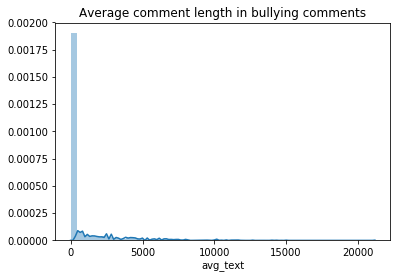

In [87]:
sns.distplot(df['avg_text'][df['label_bullying']==1]).set_title("Average comment length in bullying comments");

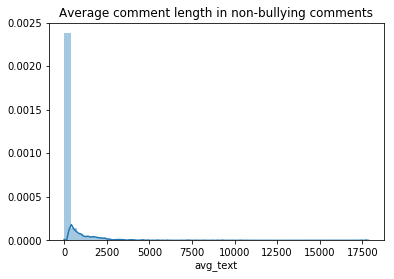

In [88]:
sns.distplot(df['avg_text'][df['label_bullying']==0]).set_title("Average comment length in non-bullying comments");

Although some texts (comments) seem to be lenghty, the vast majority of the comments are short.

**Most common words**

In [89]:
from collections import Counter
count_common = Counter(" ".join(df["tidy_text"]).split()).most_common(100)

In [90]:
count_common

[('not', 25226),
 ('like', 11246),
 ('fuck', 10805),
 ('get', 10771),
 ('laugh', 10218),
 ('love', 8342),
 ('ass', 7334),
 ('loud', 7271),
 ('go', 7191),
 ('whatever', 6910),
 ('say', 6713),
 ('know', 6212),
 ('no', 6105),
 ('people', 5429),
 ('shit', 5228),
 ('one', 5157),
 ('look', 5122),
 ('make', 5032),
 ('would', 4793),
 ('think', 4497),
 ('hate', 3903),
 ('want', 3765),
 ('see', 3758),
 ('bitch', 3697),
 ('good', 3620),
 ('need', 3406),
 ('man', 3355),
 ('damn', 3030),
 ('come', 3014),
 ('you', 3012),
 ('cannot', 2972),
 ('even', 2947),
 ('right', 2870),
 ('god', 2857),
 ('time', 2848),
 ('really', 2829),
 ('it', 2753),
 ('guy', 2691),
 ('life', 2482),
 ('suck', 2471),
 ('much', 2442),
 ('back', 2408),
 ('thank', 2398),
 ('us', 2322),
 ('way', 2310),
 ('haha', 2297),
 ('take', 2296),
 ('talk', 2248),
 ('let', 2217),
 ('please', 2202),
 ('tell', 2172),
 ('im', 2099),
 ('gay', 2084),
 ('give', 2064),
 ('omg', 2047),
 ('mean', 2024),
 ('better', 2021),
 ('still', 2009),
 ('yeah', 19

As we can see a lot of these words actually convey a sentiment, so I will not remove them.

**Most rare words**

In [91]:
from collections import Counter
count_rare = Counter(" ".join(df["tidy_text"]).split()).most_common()[-2000:]

In [92]:
count_rare

[('bathtub', 1),
 ('revocation', 1),
 ('blackslashwhite', 1),
 ('httptinyurlcomanst', 1),
 ('takj', 1),
 ('storman', 1),
 ('usd', 1),
 ('hermioneway', 1),
 ('perkiness', 1),
 ('swooooooord', 1),
 ('excedrin', 1),
 ('thoughh', 1),
 ('sspitsbergen', 1),
 ('postman', 1),
 ('totnes', 1),
 ('brietastic', 1),
 ('megavideo', 1),
 ('offshore', 1),
 ('hoster', 1),
 ('lidell', 1),
 ('anythingthat', 1),
 ('homiethose', 1),
 ('sohug', 1),
 ('himbecause', 1),
 ('loxy', 1),
 ('smtg', 1),
 ('chury', 1),
 ('cgy', 1),
 ('dreamboat', 1),
 ('eodm', 1),
 ('vonnegut', 1),
 ('gooftastic', 1),
 ('tempature', 1),
 ('supershuttle', 1),
 ('shuttle', 1),
 ('httpsnipurlcomiryv', 1),
 ('chappy', 1),
 ('acknowledgments', 1),
 ('gothat', 1),
 ('leakage', 1),
 ('warranties', 1),
 ('kthxbai', 1),
 ('trashman', 1),
 ('underwhelming', 1),
 ('onboard', 1),
 ('enought', 1),
 ('costner', 1),
 ('foolin', 1),
 ('hahahahahahahhaahahhahaa', 1),
 ('breezei', 1),
 ('talley', 1),
 ('headyour', 1),
 ('junsten', 1),
 ('pirillo', 1)

We can safely remove them, since none of them is an actual word (mostly misspellings).

In [93]:
# count_rare_list = list(count_rare.index)
df['tidy_text'] = df['tidy_text'].apply(lambda x: " ".join(x for x in x.split() if x not in count_rare))
df.head()

,index,full_text,label_bullying,tidy_text,char_count,word_count,avg_word,avg_text
246,246,"<font color=""#0066CC"">presstaaallll</font> <font color=""#0066CC"">@_the_kenzie_</font> I FEEL YOU! WHEN I READ THAT I FELT LIKE YOU WERE EXPLAINING MY EXACT SITUATION WITH SOMEONE I KNOW!!! (cre...",1,feel you read felt like explain exact situation someone know also something bother me think it sister annoy sister ever ok girls church grade year sister one grade quiet awkward talk whatever noth...,25607,4440,4.767568,21168
835,835,"<font color=""#0066CC"">baby.dawn</font> To my mom: I'm sorry I suck at everything. Sorry I'm failing school. Sorry in a fuck up. In sorry that I smile every day and hide my depression. In sorry t...",0,mom sorry suck everything sorry fail school sorry fuck up sorry smile every day hide depression sorry lie say nothing every time ask wrong sorry want kill no idea sorry never feel good enough ir a...,21225,3745,4.667824,17481
919,919,"<font color=""#0066CC"">https.imvu</font> I dont like Ur mom e.e <font color=""#0066CC"">@cutting</font> (created at:2014-06-21 21:24:57) <font color=""#0066CC"">katie_graf</font> And i can't forge...",0,not like mom ee cannot forget friends plan something without hang one them cannot believe actually shove face post picture like with lovelies think one obviously mistake want help everything over ...,20666,3633,4.688687,17034
670,670,"<font color=""#0066CC"">docdidit</font> For the muslim the anti christ is called ""al-dajjal"" (created at:2014-02-04 01:33:16) <font color=""#0066CC"">muslim4lyf</font> <font color=""#0066CC"">@reve...",0,muslim anti christ call aldajjal well know beleive jesus come back soon save us beleivers yes ofcource whatever muslims believe jesus christ peace come restore peace justice onto earth whatever al...,21404,3551,5.027879,17854
535,535,"<font color=""#0066CC"">wellhaii__</font> Ive kissed a 20 year old and Im only 15. (created at:2013-11-16 20:56:58) <font color=""#0066CC"">alanalee__</font> I miss someone who doesn't even think...",0,ive kiss year old im miss someone not even think me lead leave miss much thoughts suicide realize cannot hate myselfmy bodyand everything else cut starve want die im depress no one know want slut ...,17948,3096,4.797481,14853


**Most common bullying/non-bullying words**

**Visualizations:**
- What are the most common words in the entire dataset?
- What are the most common words in the dataset for negative and positive comments, respectively?

Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

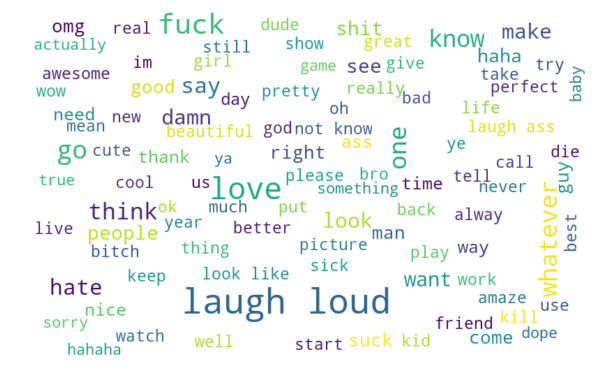

In [94]:
non_bullying_words =' '.join([text for text in df['tidy_text'][df['label_bullying'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, max_font_size=50, max_words=100,background_color="white").generate(non_bullying_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

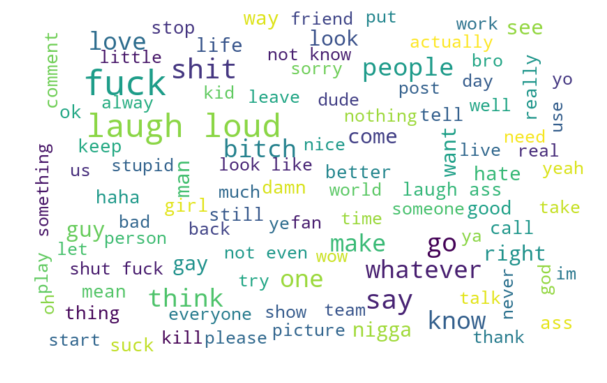

In [95]:
bullying_words =' '.join([text for text in df['tidy_text'][df['label_bullying'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, max_font_size=50, max_words=100,background_color="white").generate(bullying_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most words appear to be common to both bullying and non-bullying comments, which is not ideal. In the bullying cloud there are words with negative connotation which seem to appear more frequently, but overall, not a clear separation.

In [121]:
top_50_bullying = pd.Series(' '.join(df['tidy_text'][df['label_bullying'] == 1]).split()).value_counts()[:50]
# top_50_bullying

In [122]:
df_b = pd.DataFrame(top_50_bullying).reset_index()
df_b.columns = ['word', 'count']
df_b['label'] = '1'
# df_b

In [123]:
top_50_non_bullying = pd.Series(' '.join(df['tidy_text'][df['label_bullying'] == 0]).split()).value_counts()[:50]
# top_50_non_bullying

In [124]:
df_nb = pd.DataFrame(top_50_non_bullying).reset_index()
df_nb.columns = ['word', 'count']
df_nb['label'] = '0'
# df_nb

In [125]:
stack = pd.concat([df_b, df_nb], axis=0)

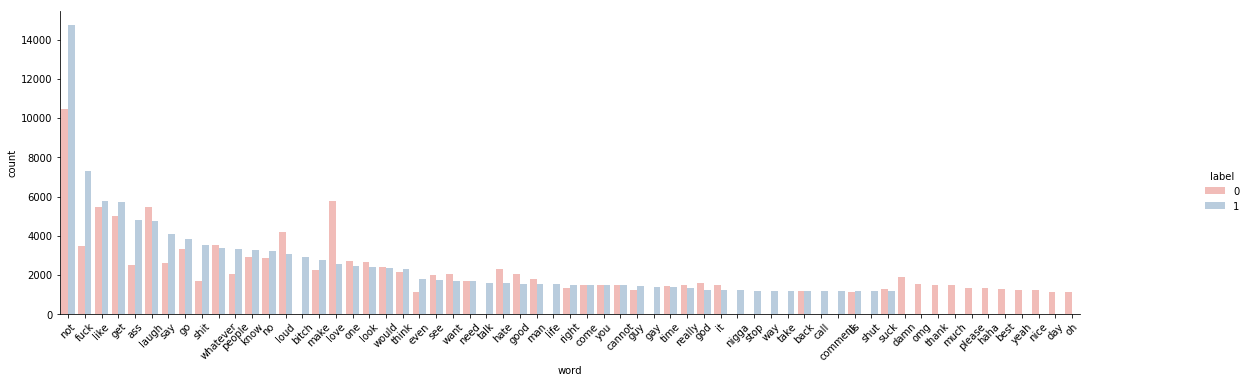

In [126]:
sns.set_palette("Pastel1")
g = sns.catplot(x='word', y='count', hue='label', data=stack, kind='bar')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)
g.set_xticklabels(rotation=45)

Unfortunately, what we see here is that for a vast majority of the top 50 words there is no clear separation between the classes. This, combined with the imbalanced nature of the dataset makes the task of accurately classifying the comments as bullying/non-bullying quite challening.

**Topics**

The Gensim package is specialized in topic modeling. A topic model is a type of statistical model for discovering the abstract “topics” that occur in a collection of documents.
I will now try to extract topics using LDA (Latent Dirichlet Allocation): a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. Basically, documents are represented as random mixtures over latent topics, where each topic is characterized by a distribution over words.

In [102]:
RANDOM_STATE = 12

In [103]:
comments = df['tidy_text'][df['label_bullying'] == 1]

In [111]:
wpt = nltk.WordPunctTokenizer()
tokenized_comments = [wpt.tokenize(comment) for comment in comments]

We remove rare words and common words based on their document frequency. Below we remove words that appear in less than 20 documents or in more than 50% of the documents.

In [112]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(tokenized_comments)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

Finally, we transform the documents to a vectorized form. We simply compute the frequency of each word, including the bigrams.

In [114]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(comment) for comment in tokenized_comments]

In [115]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1698
Number of documents: 3183


In [127]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters (as per gensim tutorial).
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [128]:
# get the output
list_dics = []
for i in range(0,10):
    list_tuples = model.get_topic_terms(i)
    for tpl in list_tuples:
        list_dics.append({"topic":i, "id":tpl[0], 
                         "word":id2word[tpl[0]], 
                         "weight":tpl[1]})
df_topics = pd.DataFrame(list_dics, columns=['topic','id','word','weight'])

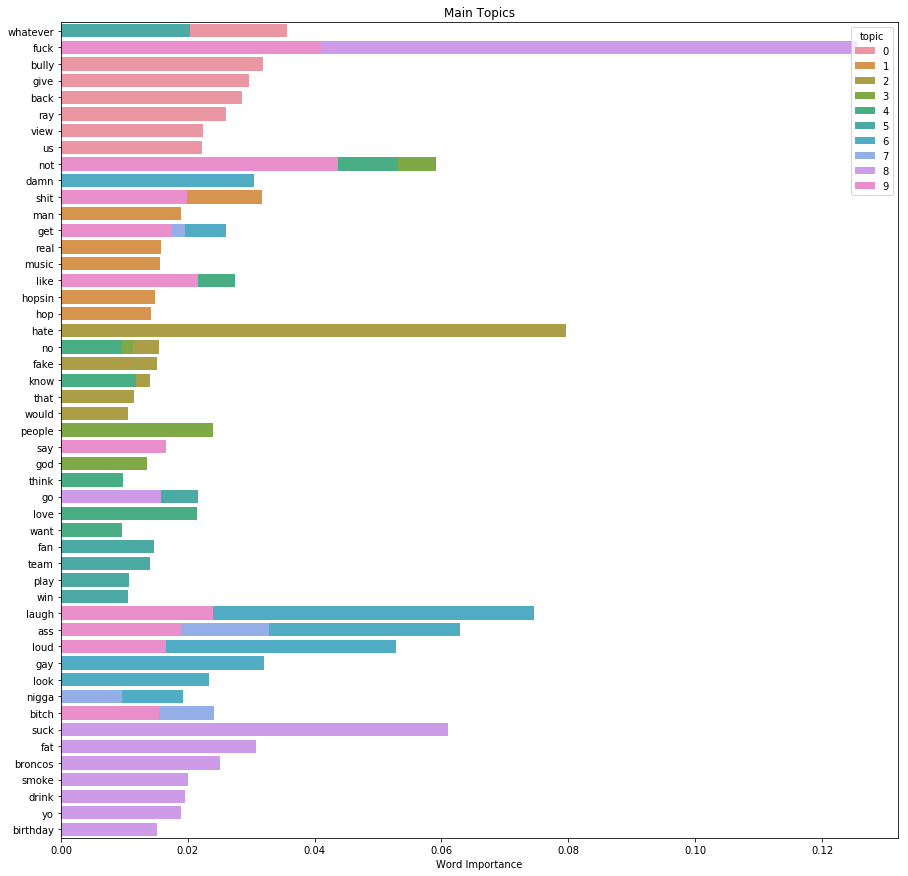

In [129]:
## plot
sns.set_palette("Pastel1")
fig, ax = plt.subplots(1,1,figsize=(15,15))
sns.barplot(y = "word", x = "weight", hue = "topic", data = df_topics, dodge = False, ax = ax).set_title('Main Topics')
ax.set(ylabel = "", xlabel = "Word Importance")
plt.show()

Here again, as in the previous cases, we see that there is no clear separation between the topics. Words belong to multiple topics.

In [119]:
# save the dataframe to a new file
df.to_csv('labeled_insta_cleaned.csv', index = False, encoding='utf-8-sig')

## Capstone Project Goal

The goal of this capstone project is to build a sentiment analysis model to identify cyberbullying in instagram comments. 

**Feature engineering**
- vectorizing - test different vectorizing models (tfidf vectorizer, word2vec, pretrained vectorizing GloVe/FastText, Keras Embeddings)
- analyse the choice of hyperparameters (for example maximum features - experiment with maximum number of features to see how the results differ.)
- visualize the features 
    
**Choice of Models**

I will be building models on the datasets with different feature sets prepared in the earlier sections, using the following algorithms:

- **Logistic Regression:** typical classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. This will also be the baseline against which I compare the performance of the other algorithms.
- **Naïve Bayes:** a family of probabilistic algorithms that uses Bayes’s Theorem to predict the category of a text. It is a very popular method of text classification and uses word frequency as its features. In the current set of problem, for determining a sentiment polarity into a positive or a negative sentiment, the Naïve Bayes is considered as one of the best algorithm that can be used for a binomial classification problem.
- **XGBoost:** Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. 
- **Neural Nets:** Recently Convolutional Neural Networks (CNNs) models have proven remarkable results for text classification and sentiment analysis.

The authors of the original paper have used logistic regression, SVM and Naïve Bayes using N-grams. The result was that linear SVM classifiers based on text-based N-grams with normalization and stop words removal achieved the highest recall 79%, with precision 71%, implying an F1 score = 74%. I would like to investigate whether the other algorithms as well as different choices of feature extraction can improve this result.

**Strategies for Dealing with Imbalanced Data**


**Choice of Metric**

When the distribution of the classes in data is well balanced, accuracy can give  a good picture of how the model is performing. But when we have skewed data, then accuracy might not be enough to evaluate your model. In our case we have a dataset which roughly contains 70% positive class, and 30% negative class. This means that by predicting every data into the positive class, the model will get 70% accuracy. 

<img src="cf.jpg" width=360 height=360 />

Based on the confusion matrix we can measure the following:
- Precision: True Positives / All Predicted Positives = TP / (TP+FP). Precision is a measure of a classiffier’s exactness. Low precision indicates a high number of false positives.
- Recall: True Positives / All actual positives = TP / (TP + FN). Recall is a measure of a classiffier’s completeness. It is also the same as Sensitivity or the True positive rate. Low recall indicates a high number of false negatives.
- F1 score: (2 * Precision * Recall)/(Precision + Recall). A weighted average of precision and recall. Since I want a balance between precision and recall then I'll look at the F1 score.

There also several ways to compute these scores: macro, micro and weighted average. So we have to specify an average argument for the score method. Which one we choose is depends on how we want to measure the performance of the classifier.

In order to evaluate the performance of the model, I will take a look at the following metrics:
- Precision: the fraction of relevant instances among the retrieved instances.
- Recall: the fraction of the total amount of relevant instances that were actually retrieved.
- F1 Score: harmonic mean between precision and recall. Since it is difficult to compare two models with low precision and high recall or vice versa, we make them comparable by using the F-Score. F-score helps to measure Recall and Precision at the same time. It uses harmonic mean in place of arithmetic mean by punishing the extreme values more. The F1 score is highly influenced by which class is labeled as positive. 
- Confusion Matrix: a summary table that breaks down the number of correct and incorrect predictions by each class. For imbalanced classification problems, the majority class is typically referred to as the negative outcome (e.g. such as “no change” or “negative test result“), and the minority class is typically referred to as the positive outcome (e.g. “change” or “positive test result”). The confusion matrix provides more insight into not only the performance of a predictive model, but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made.
- ROC: a plot that illustrates the true positive rate against the false positive rate at various threshold settings. The area under the curve (AUC) indicates the probability that the classifier will rank a randomly chosen positive observation higher than a randomly chosen negative one.

**Resampling the Data Set**

This step can be done while trying the different models mentioned above. The different types of resampling are as follows:
- Under-sampling the majority class 
- Over-sampling the minority class


<img src="sampling.jpg" width=760 height=760 />


**Under-sampling (Down-sampling) the majority class**

Under-sampling randomly removes observations of the majority class. This reduces the number of majority class observations used in the training set and as a result balances the number of observations of the two classes better. This is suitable when we have a lots of observations in the dataset (>10K observations). The risk is we are losing information and so this approach may lead to underfitting.

**Over-sampling (Up-sampling) the minority class**

Over-sampling randomly duplicates observations from the minority class in order to make its signal stronger. The simplest form of oversampling is sampling with replacement. Oversampling is suitable when we don’t have a lots of observations in your dataset (<10K observations). The risk is if we duplicate too many observations, well then we are overfitting.

**Synthetic samples**

In order to reduce overfitting during upsampling, we can also try creating synthetic samples. A popular algorithm is SMOTE (Synthetic Minority Over Sampling Technique). Instead of using copies of observations to oversample, SMOTE varies attributes of the observations to create new synthetic samples. This sound just like what I need for this project, so I will be using SMOTE to balance the classes.